## Solutions: 
* Come up with a plan to grow the market by 20% in two months.

## 0. Import all the toolboxes needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine_vector, haversine, Unit
import statistics as statis
from matplotlib.ticker import PercentFormatter
from scipy import stats
import random

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import datetime
from datetime import timedelta


sns.set()

In [ ]:


POPULAR RESTARANT CLUSTER(N) 100 ORDER PER DAY
POPULAR RESTAUNT CLUSTER(E)  10 DO WE HAVE TO PROVIDE THE SERVICE?
IF 

## 1. Import data & encoding for ML

In [2]:
j1 = pd.read_csv('data/j_ana.csv')

In [3]:
j1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 27 columns):
delivery_id                             4646 non-null int64
customer_id                             4646 non-null int64
jumpman_id                              4646 non-null int64
vehicle_type                            4646 non-null object
pickup_place                            4646 non-null object
place_category                          4646 non-null object
item_quantity                           4646 non-null float64
item_category_name                      4646 non-null object
how_long_it_took_to_order               4646 non-null float64
pickup_lat                              4646 non-null float64
pickup_lon                              4646 non-null float64
dropoff_lat                             4646 non-null float64
dropoff_lon                             4646 non-null float64
when_the_delivery_started               4646 non-null object
when_the_Jumpman_arrived_at_pickup  

In [4]:
j1.columns

Index(['delivery_id', 'customer_id', 'jumpman_id', 'vehicle_type',
       'pickup_place', 'place_category', 'item_quantity', 'item_category_name',
       'how_long_it_took_to_order', 'pickup_lat', 'pickup_lon', 'dropoff_lat',
       'dropoff_lon', 'when_the_delivery_started',
       'when_the_Jumpman_arrived_at_pickup', 'when_the_Jumpman_left_pickup',
       'when_the_Jumpman_arrived_at_dropoff', 'distance',
       'time_for_Jumpman_to_arrive_at_pickup', 'Jumpman_waiting_time',
       'time_for_delivery', 'extra_food_prep_time', 'customer_waiting_time',
       'Jumpman_speed', 'loyal_customer', 'customer_order_freq', 'meal'],
      dtype='object')

jumpman_id, customer_id, customer_order_freq, location and timestamp need to be drop or it will highly affect the predictoin results

In [5]:
# location not included
j1_drop_1 = j1[['item_quantity', 'how_long_it_took_to_order','distance',
       'time_for_Jumpman_to_arrive_at_pickup', 'Jumpman_waiting_time',
       'time_for_delivery', 'extra_food_prep_time', 'customer_waiting_time',
       'Jumpman_speed', 'loyal_customer']]


# Include everything like turn the time 15:00:18 into str(150018)
# j1_drop_3 = EXTRA FEATURE -- DAY OF THE MONTH, DAY OF THE WEEK, WEEK NUMBER OF THE MONTH, DAY OF THE YEAR 
# WEEK DAY , WEEKEND

#### Label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = j1[['vehicle_type', 'pickup_place', 'place_category','item_category_name','meal']]

le_columns = column_to_encode.apply(LabelEncoder().fit_transform)

j1_le = j1_drop_1.join(le_columns)
j1_le.head()
j1_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 15 columns):
item_quantity                           4646 non-null float64
how_long_it_took_to_order               4646 non-null float64
distance                                4646 non-null float64
time_for_Jumpman_to_arrive_at_pickup    4646 non-null float64
Jumpman_waiting_time                    4646 non-null float64
time_for_delivery                       4646 non-null float64
extra_food_prep_time                    4646 non-null float64
customer_waiting_time                   4646 non-null float64
Jumpman_speed                           4646 non-null float64
loyal_customer                          4646 non-null int64
vehicle_type                            4646 non-null int64
pickup_place                            4646 non-null int64
place_category                          4646 non-null int64
item_category_name                      4646 non-null int64
meal                               

#### One hot encoding

In [7]:
column_to_encode_1 = j1[['vehicle_type', 'pickup_place', 'place_category','item_category_name','meal']]

ohe_columns = pd.get_dummies(column_to_encode_1)

j1_ohe = j1_drop_1.join(ohe_columns)
j1_ohe.head()
j1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Columns: 927 entries, item_quantity to meal_midnight-food
dtypes: float64(9), int64(1), uint8(917)
memory usage: 4.4 MB


## 2. Machine learning
* Logistic regression
* Random Forest Classifier
* Gradient Boosting Classifier

### 2.0 Data we use

* Delivery_id, location not included
    * j1_drop_1 = j1[['jumpman_id', 'item_quantity', 'how_long_it_took_to_order','distance',
       'time_for_Jumpman_to_arrive_at_pickup', 'Jumpman_waiting_time',
       'time_for_delivery', 'extra_food_prep_time', 'customer_waiting_time',
       'Jumpman_speed', 'loyal_customer']]

### 2.1 Logistic regression

Winner: Logistic regression + OHE
* Training accuracy:  0.563362344853217
* Testing accuracy:  0.5955249569707401

### 2.1.0 Logistic regression + LE
* Training accuracy:  0.5436518566589561
* Testing accuracy:  0.5817555938037866

In [8]:
from sklearn.linear_model import LogisticRegression

X = j1_le.drop(['loyal_customer'], axis=1)
y = j1_le[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)


In [9]:
lr = LogisticRegression()

In [10]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

=== Confusion Matrix on test===
[[ 40 219]
 [ 24 298]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.62      0.15      0.25       259
           1       0.58      0.93      0.71       322

    accuracy                           0.58       581
   macro avg       0.60      0.54      0.48       581
weighted avg       0.60      0.58      0.50       581





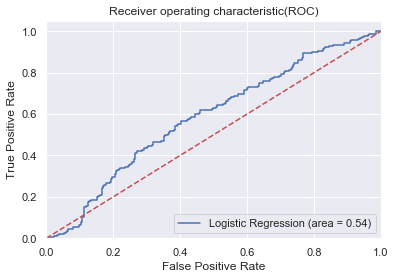

=== Mean AUC Score on CV===
Mean AUC Score:  0.5209410651257842


=== Mean f1 Score on CV===
Mean f1 Score:  0.6829620739508798


=== Training and tesing accuracy===
Training accuracy:  0.5436518566589561
Testing accuracy:  0.5817555938037866


In [11]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


lr_cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(lr, X_train, y_train, cv=10)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())
print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

By dropping all P > 0.05 the result do not improve

By normalized the lable encoded data we see an decrease on f1 score, but increaed AUC

### 2.1.1 Logistic regression + LE + Scaling
* Training accuracy:  0.5507916938697872
* Testing accuracy:  0.5817555938037866

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
lr = LogisticRegression()


In [14]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

=== Confusion Matrix on test===
[[ 40 219]
 [ 24 298]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.62      0.15      0.25       259
           1       0.58      0.93      0.71       322

    accuracy                           0.58       581
   macro avg       0.60      0.54      0.48       581
weighted avg       0.60      0.58      0.50       581





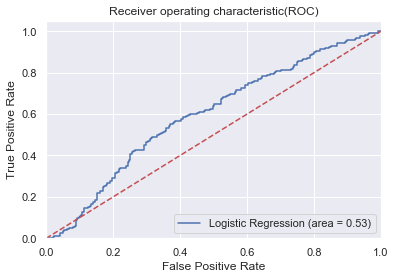

=== Mean AUC Score on CV===
Mean AUC Score:  0.5273416374641492


=== Mean f1 Score on CV===
Mean f1 Score:  0.6907243336037407


=== Training and tesing accuracy===
Training accuracy:  0.5507916938697872
Testing accuracy:  0.5817555938037866


In [15]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


lr_cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(lr, X_train, y_train, cv=10)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())
print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.1.2 Logistic regression + LE + Scaling + GridSearch
* Training accuracy:  0.5517835694813382
* Testing accuracy:  0.5817555938037866

In [16]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'random_state':[0]}

grid = GridSearchCV(lr, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train,y_train)

grid.best_params_

{'C': 0.001, 'penalty': 'l2', 'random_state': 0}

In [18]:
grid.best_estimator_



LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
lr = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [20]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

=== Confusion Matrix on test===
[[ 40 219]
 [ 24 298]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.62      0.15      0.25       259
           1       0.58      0.93      0.71       322

    accuracy                           0.58       581
   macro avg       0.60      0.54      0.48       581
weighted avg       0.60      0.58      0.50       581





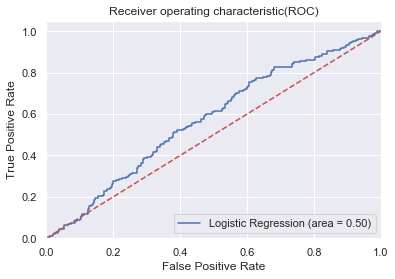

=== Mean AUC Score on CV===
Mean AUC Score:  0.5292166987644153


=== Mean f1 Score on CV===
Mean f1 Score:  0.7111604042100772


=== Training and tesing accuracy===
Training accuracy:  0.5517835694813382
Testing accuracy:  0.5817555938037866


In [21]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


lr_cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(lr, X_train, y_train, cv=10)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())
print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))


In [22]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.683928
         Iterations 4
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.006     
Dependent Variable:        loyal_customer         AIC:                    6383.0611 
Date:                      2020-07-15 11:12       BIC:                    6473.2738 
No. Observations:          4646                   Log-Likelihood:         -3177.5   
Df Model:                  13                     LL-Null:                -3195.1   
Df Residuals:              4632                   LLR p-value:            0.00080294
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            4.0000                                                   
------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975

### 2.1.3 Logistic regression + OHE
* Training accuracy:  0.563362344853217
* Testing accuracy:  0.5955249569707401

In [23]:
from sklearn.linear_model import LogisticRegression

X = j1_ohe.drop(['loyal_customer'], axis=1)
y = j1_ohe[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)




In [24]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = lr.predict(X_test)

=== Confusion Matrix on test===
[[125 134]
 [101 221]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.55      0.48      0.52       259
           1       0.62      0.69      0.65       322

    accuracy                           0.60       581
   macro avg       0.59      0.58      0.58       581
weighted avg       0.59      0.60      0.59       581





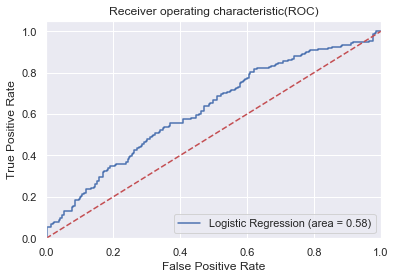

=== Mean AUC Score on CV===
Mean AUC Score:  0.5788276099496825


=== Mean f1 Score on CV===
Mean f1 Score:  0.6341088861391014


=== Training and tesing accuracy===
Training accuracy:  0.563362344853217
Testing accuracy:  0.5955249569707401


In [26]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


lr_cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(lr, X_train, y_train, cv=10)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())
print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.1.4 Logistic regression + OHE + Grid search
* Training accuracy:  0.5655784765825335
* Testing accuracy:  0.5851979345955249
* The one hot encode f1 score improved by a little, but AUC decrease. And from confusion matrix, the regression just class everyone in the data set as a loyal customer.

In [27]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'random_state':[0]}

grid = GridSearchCV(lr, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train,y_train)

grid.best_params_

{'C': 1.0, 'penalty': 'l1', 'random_state': 0}

In [28]:
grid.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = lr.predict(X_test)

=== Confusion Matrix on test===
[[109 150]
 [ 91 231]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.55      0.42      0.47       259
           1       0.61      0.72      0.66       322

    accuracy                           0.59       581
   macro avg       0.58      0.57      0.57       581
weighted avg       0.58      0.59      0.58       581





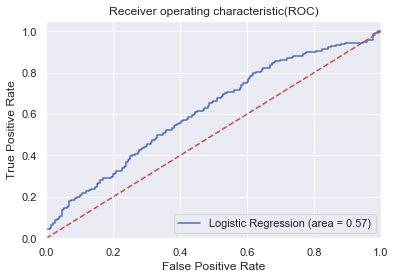

=== Mean AUC Score on CV===
Mean AUC Score:  0.5721747286346233


=== Mean f1 Score on CV===
Mean f1 Score:  0.6547361808901532


=== Training and tesing accuracy===
Training accuracy:  0.5655784765825335
Testing accuracy:  0.5851979345955249


In [32]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


lr_cv_score = cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc')
lr_cv_score1 = cross_val_score(lr, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(lr, X_train, y_train, cv=10)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", lr_cv_score.mean())
print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", lr_cv_score1.mean())
print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.1 Random Forest Classification
Winner = Random Forest Classification + LE + Grid Search
* Training accuracy:  0.5567060468176087
* Testing accuracy:  0.5783132530120482

### 2.1.0 Random Forest Classification + LE 
* Training accuracy:  0.522279453592841
* Testing accuracy:  0.5283993115318416

In [33]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

X = j1_le.drop(['loyal_customer'], axis=1)
y = j1_le[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)


In [35]:
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
y_pred = rfc.predict(X_test)



=== Confusion Matrix on test===
[[138 121]
 [153 169]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       259
           1       0.58      0.52      0.55       322

    accuracy                           0.53       581
   macro avg       0.53      0.53      0.53       581
weighted avg       0.53      0.53      0.53       581





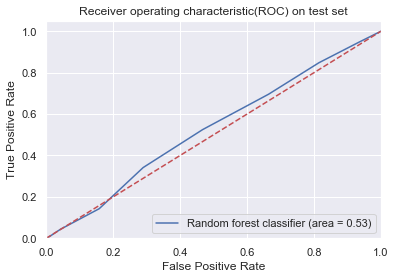



=== Mean AUC Score on CV===
Mean AUC Score:  0.5309930434920921


=== Mean f1 Score on CV===
Mean f1 Score:  0.5469040782668668


=== Training and tesing accuracy===
Training accuracy:  0.522279453592841
Testing accuracy:  0.5283993115318416


In [37]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score1 = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(rfc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", rfc_cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", rfc_cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

<Figure size 1080x576 with 0 Axes>

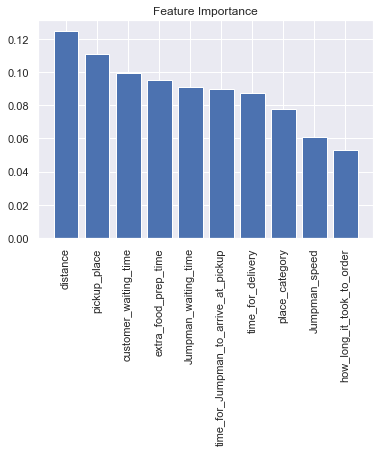

In [38]:
importances = rfc.feature_importances_

fig = plt.gcf();
fig.set_size_inches(15,8);

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:10];

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices];

# Create plot
plt.figure();

# Create plot title
plt.title("Feature Importance");

# Add bars
plt.bar(range(0, 10), importances[indices]);

# Add feature names as x-axis labels
plt.xticks(range(0, 10), names[:10], rotation=90);

# Show plot
plt.show();

### 2.1.1 Random Forest Classification + LE + Grid Search
* Training accuracy:  0.5567060468176087
* Testing accuracy:  0.5783132530120482

In [40]:
param_grid = {'bootstrap': [True, False],'max_depth': [3,4,5],'max_features': ['auto','sqrt','log2'],\
               'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5],\
              'n_estimators': [100, 500, 1000], 'criterion': ['gini','entropy'], 'random_state':[0]}


grid = GridSearchCV(rfc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train,y_train)

grid.best_params_

# grid.best_estimator_

# grid_predictions = grid.predict(X_test)

# print(confusion_matrix(y_test,grid_predictions))
# print('\n')
# print(classification_report(y_test,grid_predictions))

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 0}

In [42]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
param_grid = {'bootstrap': [False],'max_depth': [7,8,9],'max_features': ['auto'],\
               'min_samples_leaf': [6,7,8],'min_samples_split': [2],\
              'n_estimators': [100], 'criterion': ['entropy'], 'random_state':[0]}

grid = GridSearchCV(rfc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train,y_train)

grid.best_params_

grid.best_estimator_


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Fit the label encoded data with new tunning variables, and it showed an significantly improved score

In [45]:
rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
y_pred = rfc.predict(X_test)


=== Confusion Matrix on test===
[[ 48 211]
 [ 34 288]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.59      0.19      0.28       259
           1       0.58      0.89      0.70       322

    accuracy                           0.58       581
   macro avg       0.58      0.54      0.49       581
weighted avg       0.58      0.58      0.51       581





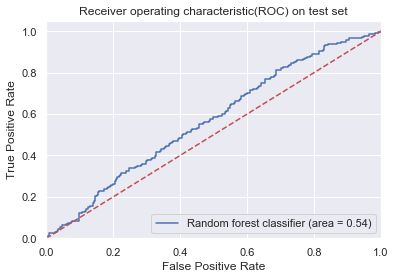



=== Mean AUC Score on CV===
Mean AUC Score:  0.5424168018370301


=== Mean f1 Score on CV===
Mean f1 Score:  0.6875369212621292


=== Training and tesing accuracy===
Training accuracy:  0.5567060468176087
Testing accuracy:  0.5783132530120482


In [47]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score1 = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(rfc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", rfc_cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", rfc_cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

Scaling on label encoded data do not perform well here

### 2.1.2 Random Forest Classification + LE + Grid Search + Scaling
Do not do well

In [168]:
# scaler = MinMaxScaler(feature_range = (0,1))

# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

### 2.1.3 Random Forest Classification + OHE
* Training accuracy:  0.5240066292551079
* Testing accuracy:  0.5576592082616179

In [48]:
X = j1_ohe.drop(['loyal_customer'], axis=1)
y = j1_ohe[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)



In [49]:
rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
y_pred = rfc.predict(X_test)



=== Confusion Matrix on test===
[[143 116]
 [141 181]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.50      0.55      0.53       259
           1       0.61      0.56      0.58       322

    accuracy                           0.56       581
   macro avg       0.56      0.56      0.56       581
weighted avg       0.56      0.56      0.56       581





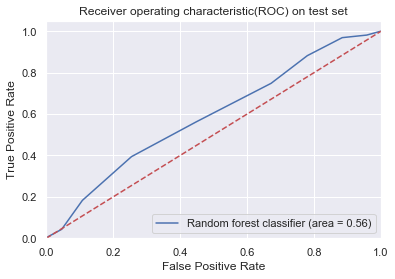



=== Mean AUC Score on CV===
Mean AUC Score:  0.5274289184988834


=== Mean f1 Score on CV===
Mean f1 Score:  0.5582915822829014


=== Training and tesing accuracy===
Training accuracy:  0.5240066292551079
Testing accuracy:  0.5576592082616179


In [51]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score1 = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(rfc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", rfc_cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", rfc_cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.1.3 Random Forest Classification + OHE + Grid Search
* Training accuracy:  0.5522834275623323
* Testing accuracy:  0.5593803786574871

In [52]:
param_grid = {'bootstrap': [True, False],'max_depth': [3,4,5],'max_features': ['auto','sqrt','log2'],\
               'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5],\
              'n_estimators': [100, 500, 1000], 'criterion': ['gini','entropy'], 'random_state':[0]}


grid = GridSearchCV(rfc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train,y_train)

grid.best_params_



{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 0}

In [53]:
grid.best_params_

grid.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
param_grid = {'bootstrap': [True, False],'max_depth': [5, 6, 7],'max_features': ['auto'],\
               'min_samples_leaf': [1],'min_samples_split': [2],\
              'n_estimators': [500], 'criterion': ['gini'], 'random_state':[0]}


grid = GridSearchCV(rfc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train,y_train)

grid.best_params_



{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 0}

In [55]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
y_pred = rfc.predict(X_test)

=== Confusion Matrix on test===
[[ 12 247]
 [  9 313]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.57      0.05      0.09       259
           1       0.56      0.97      0.71       322

    accuracy                           0.56       581
   macro avg       0.57      0.51      0.40       581
weighted avg       0.56      0.56      0.43       581





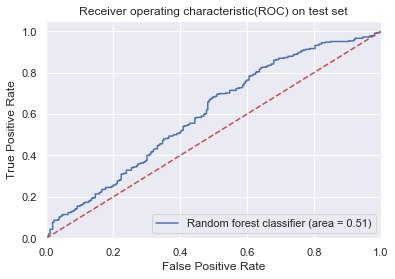



=== Mean AUC Score on CV===
Mean AUC Score:  0.5715521035284649


=== Mean f1 Score on CV===
Mean f1 Score:  0.7044145758166448


=== Training and tesing accuracy===
Training accuracy:  0.5522834275623323
Testing accuracy:  0.5593803786574871


In [59]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score1 = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1')
lr_cv_score2 = cross_val_score(rfc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", rfc_cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", rfc_cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", lr_cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.2 Gradient Boosting Classifier

The winner is original label encoded data:
* Training accuracy:  0.5441625930216193
* Testing accuracy:  0.5903614457831325

#### 2.2.0 Gradient Boosting Classifier + LE
* Training accuracy:  0.5549885509571106
* Testing accuracy:  0.5628227194492255

In [80]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

X = j1_le.drop(['loyal_customer'], axis=1)
y = j1_le[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)



In [79]:
gbc = GradientBoostingClassifier(random_state=0)

gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
y_pred = gbc.predict(X_test)

=== Confusion Matrix on test===
[[ 76 183]
 [ 71 251]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.52      0.29      0.37       259
           1       0.58      0.78      0.66       322

    accuracy                           0.56       581
   macro avg       0.55      0.54      0.52       581
weighted avg       0.55      0.56      0.53       581





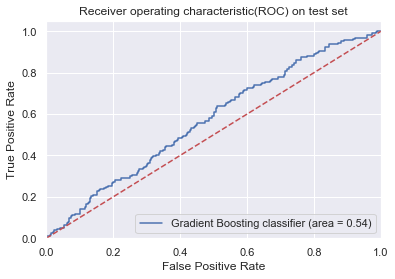



=== Mean AUC Score on CV===
Mean AUC Score:  0.5485083991789935


=== Mean f1 Score on CV===
Mean f1 Score:  0.662543232173357


=== Training and tesing accuracy===
Training accuracy:  0.5549885509571106
Testing accuracy:  0.5628227194492255


In [63]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(gbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(gbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(gbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

<Figure size 1080x576 with 0 Axes>

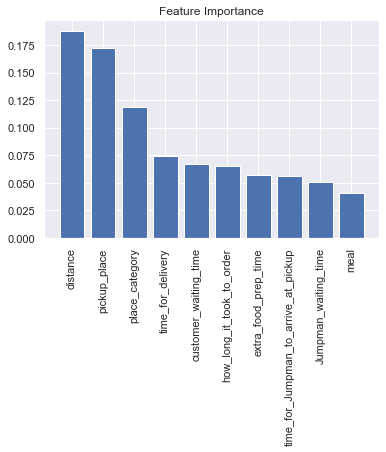

In [64]:
importances = gbc.feature_importances_

fig = plt.gcf();
fig.set_size_inches(15,8);

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:10];

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices];

# Create plot
plt.figure();

# Create plot title
plt.title("Feature Importance");

# Add bars
plt.bar(range(0, 10), importances[indices]);

# Add feature names as x-axis labels
plt.xticks(range(0, 10), names[:10], rotation=90);

# Show plot
plt.show();

#### 2.2.1 Gradient Boost + LE + GRID
* Training accuracy:  0.5601519049541361
* Testing accuracy:  0.5989672977624785

In [65]:
param_grid = {'learning_rate': [1, 0.5, 0.1, 0.01],'max_depth': np.linspace(1, 32, 4, endpoint=True),\
            'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),\
              'n_estimators': [100, 200], "max_features":['auto','sqrt','log2'],'random_state':[0]}

grid = GridSearchCV(gbc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1.0,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1.0,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1.0,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
y_pred = gbc.predict(X_test)

=== Confusion Matrix on test===
[[ 63 196]
 [ 37 285]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.63      0.24      0.35       259
           1       0.59      0.89      0.71       322

    accuracy                           0.60       581
   macro avg       0.61      0.56      0.53       581
weighted avg       0.61      0.60      0.55       581





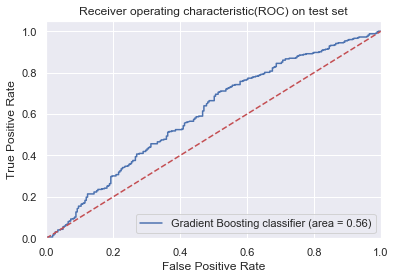



=== Mean AUC Score on CV===
Mean AUC Score:  0.5370141751950885


=== Mean f1 Score on CV===
Mean f1 Score:  0.6855547898176784


=== Training and tesing accuracy===
Training accuracy:  0.5601519049541361
Testing accuracy:  0.5989672977624785


In [83]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(gbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(gbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(gbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

<Figure size 1080x576 with 0 Axes>

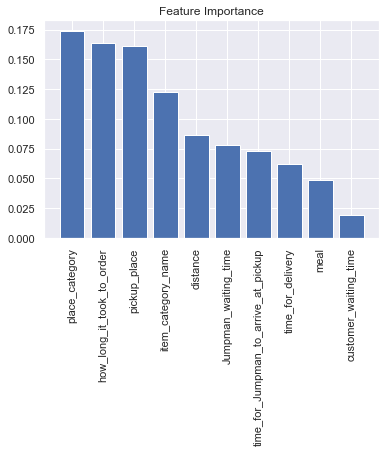

In [84]:
importances = gbc.feature_importances_

fig = plt.gcf();
fig.set_size_inches(15,8);

# Sort feature importances in descending order
indices = (np.argsort(importances)[::-1])[:10];

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices];

# Create plot
plt.figure();

# Create plot title
plt.title("Feature Importance");

# Add bars
plt.bar(range(0, 10), importances[indices]);

# Add feature names as x-axis labels
plt.xticks(range(0, 10), names[:10], rotation=90);

# Show plot
plt.show();

#### 2.2.2 Gradient Boost + OHE 
* Training accuracy:  0.565079220708024
* Testing accuracy:  0.5989672977624785

In [70]:
X = j1_ohe.drop(['loyal_customer'], axis=1)
y = j1_ohe[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)



In [71]:
gbc = GradientBoostingClassifier(random_state=0)

gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
y_pred = gbc.predict(X_test)

=== Confusion Matrix on test===
[[ 73 186]
 [ 47 275]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.61      0.28      0.39       259
           1       0.60      0.85      0.70       322

    accuracy                           0.60       581
   macro avg       0.60      0.57      0.54       581
weighted avg       0.60      0.60      0.56       581





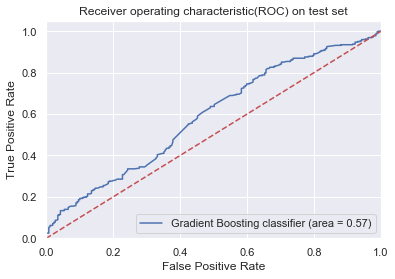



=== Mean AUC Score on CV===
Mean AUC Score:  0.5655452292606127


=== Mean f1 Score on CV===
Mean f1 Score:  0.6857411324581368


=== Training and tesing accuracy===
Training accuracy:  0.565079220708024
Testing accuracy:  0.5989672977624785


In [73]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(gbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(gbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(gbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

#### 2.2.3 Gradient Boost + OHE + GRID
* Training accuracy:  0.5534998520292639
* Testing accuracy:  0.5611015490533563

In [74]:
param_grid = {'learning_rate': [1, 0.5, 0.1, 0.01],'max_depth': np.linspace(1, 32, 4, endpoint=True),\
            'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True),\
              'n_estimators': [100, 200], "max_features":['auto','sqrt','log2'],'random_state':[0]}

grid = GridSearchCV(gbc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance',
                           max_depth=11.333333333333334, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=0.1,
                           min_samples_split=0.55, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           presort='auto', random_state=0, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance',
                           max_depth=11.333333333333334, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=0.1,
                           min_samples_split=0.55, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           presort='auto', random_state=0, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance',
                           max_depth=11.333333333333334, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=0.1,
                           min_samples_split=0.55, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           presort='auto', random_state=0, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [76]:
y_pred = gbc.predict(X_test)

=== Confusion Matrix on test===
[[  6 253]
 [  2 320]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.75      0.02      0.04       259
           1       0.56      0.99      0.72       322

    accuracy                           0.56       581
   macro avg       0.65      0.51      0.38       581
weighted avg       0.64      0.56      0.42       581





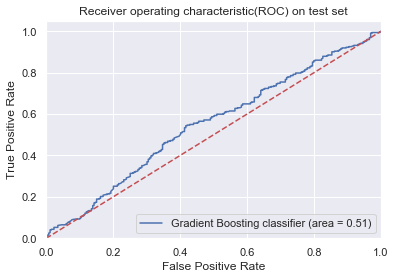



=== Mean AUC Score on CV===
Mean AUC Score:  0.5243804228395856


=== Mean f1 Score on CV===
Mean f1 Score:  0.7075482929589254


=== Training and tesing accuracy===
Training accuracy:  0.5534998520292639
Testing accuracy:  0.5611015490533563


In [77]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(gbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(gbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(gbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 1.2.3 Cat Boost Classifier

Winner: CatBoost + OHE 
* Training accuracy:  0.5635977808898701
* Testing accuracy:  0.6024096385542169

### 1.2.3.0 CatBoost + LE
* Training accuracy:  0.5535107095451923
* Testing accuracy:  0.5817555938037866

In [92]:
from catboost import Pool, CatBoostClassifier

X = j1_le.drop(['loyal_customer'], axis=1)
y = j1_le[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)


In [93]:
cbc = CatBoostClassifier(random_state=0, silent=True)

cbc.fit(X_train,y_train)

In [94]:
y_pred = cbc.predict(X_test)

=== Confusion Matrix on test===
[[ 87 172]
 [ 71 251]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.55      0.34      0.42       259
           1       0.59      0.78      0.67       322

    accuracy                           0.58       581
   macro avg       0.57      0.56      0.55       581
weighted avg       0.57      0.58      0.56       581





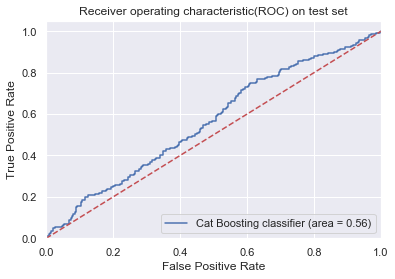



=== Mean AUC Score on CV===
Mean AUC Score:  0.5431410957580454


=== Mean f1 Score on CV===
Mean f1 Score:  0.6615200765415564


=== Training and tesing accuracy===
Training accuracy:  0.5535107095451923
Testing accuracy:  0.5817555938037866


In [95]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(cbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(cbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(cbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Cat Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 1.2.3.1 CatBoost + LE + Grid search
* Training accuracy:  0.5682709269423265
* Testing accuracy:  0.576592082616179


In [96]:
param_grid = {'learning_rate': [1, 0.5, 0.1, 0.01],\
              'n_estimators': [100, 200],'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5, 7, 9],'random_state':[0], 'silent':[True]}

grid = GridSearchCV(cbc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_estimator_

In [97]:
grid.best_params_

{'depth': 4,
 'l2_leaf_reg': 9,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 0,
 'silent': True}

In [98]:
cbc = CatBoostClassifier(depth=4,
 l2_leaf_reg=9,
 learning_rate=0.1,
 n_estimators=100,
 random_state=0,
 silent=True)

cbc.fit(X_train,y_train)

In [99]:
y_pred = cbc.predict(X_test)

=== Confusion Matrix on test===
[[ 56 203]
 [ 43 279]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.57      0.22      0.31       259
           1       0.58      0.87      0.69       322

    accuracy                           0.58       581
   macro avg       0.57      0.54      0.50       581
weighted avg       0.57      0.58      0.52       581





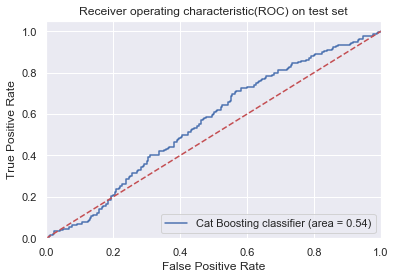



=== Mean AUC Score on CV===
Mean AUC Score:  0.5469792397623194


=== Mean f1 Score on CV===
Mean f1 Score:  0.6916085640384658


=== Training and tesing accuracy===
Training accuracy:  0.5682709269423265
Testing accuracy:  0.576592082616179


In [100]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(cbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(cbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(cbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Cat Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 1.2.3.2 CatBoost + OHE 
Training accuracy:  0.5635977808898701
Testing accuracy:  0.6024096385542169

In [101]:
X = j1_ohe.drop(['loyal_customer'], axis=1)
y = j1_ohe[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)


In [102]:
cbc = CatBoostClassifier(random_state=0, silent=True)

cbc.fit(X_train,y_train)

In [103]:
y_pred = cbc.predict(X_test)

In [ ]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(cbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(cbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(cbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Cat Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

=== Confusion Matrix on test===
[[ 95 164]
 [ 62 260]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.61      0.37      0.46       259
           1       0.61      0.81      0.70       322

    accuracy                           0.61       581
   macro avg       0.61      0.59      0.58       581
weighted avg       0.61      0.61      0.59       581





### 1.2.3.3 CatBoost + OHE + Grid search
* Training accuracy:  0.5493374275067986
* Testing accuracy:  0.5817555938037866

In [117]:
param_grid = {'learning_rate': [1, 0.5, 0.1, 0.01],\
              'n_estimators': [100, 200],'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3, 5, 7, 9],'random_state':[0], 'silent':[True]}

grid = GridSearchCV(cbc, param_grid, verbose=0, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

{'depth': 4,
 'l2_leaf_reg': 7,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 0,
 'silent': True}

In [118]:
cbc = CatBoostClassifier(depth=4,
 l2_leaf_reg=7,
 learning_rate=0.1,
 n_estimators=200,
 random_state=0,
 silent=True)

cbc.fit(X_train,y_train)

In [119]:
y_pred = cbc.predict(X_test)

=== Confusion Matrix on test===
[[ 83 176]
 [ 67 255]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.55      0.32      0.41       259
           1       0.59      0.79      0.68       322

    accuracy                           0.58       581
   macro avg       0.57      0.56      0.54       581
weighted avg       0.57      0.58      0.56       581





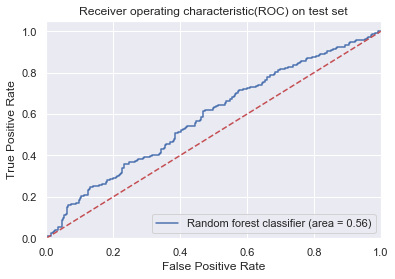



=== Mean AUC Score on CV===
Mean AUC Score:  0.5439543080087577


=== Mean f1 Score on CV===
Mean f1 Score:  0.6529587743353036


=== Training and tesing accuracy===
Training accuracy:  0.5493374275067986
Testing accuracy:  0.5817555938037866


In [120]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(cbc, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(cbc, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(cbc, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Cat Boosting classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.4 XGBOOST

### 2.4.0 XGBOOST + LE
* Training accuracy:  0.5549825051599899
* Testing accuracy:  0.5869191049913941

In [87]:
import xgboost as xgb
from xgboost import XGBClassifier



X = j1_le.drop(['loyal_customer'], axis=1)
y = j1_le[['loyal_customer']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.125, random_state=0)



In [88]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
y_pred = xgb.predict(X_test)

=== Confusion Matrix on test===
[[ 84 175]
 [ 65 257]]


=== Classification Report on test===
              precision    recall  f1-score   support

           0       0.56      0.32      0.41       259
           1       0.59      0.80      0.68       322

    accuracy                           0.59       581
   macro avg       0.58      0.56      0.55       581
weighted avg       0.58      0.59      0.56       581





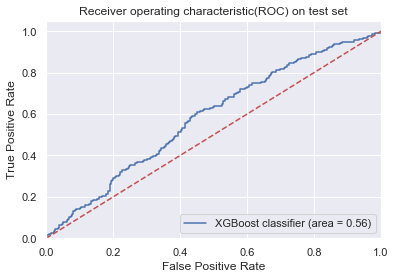



=== Mean AUC Score on CV===
Mean AUC Score:  0.5471511647288873


=== Mean f1 Score on CV===
Mean f1 Score:  0.6625939158562574


=== Training and tesing accuracy===
Training accuracy:  0.5549825051599899
Testing accuracy:  0.5869191049913941


In [90]:
print("=== Confusion Matrix on test===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report on test===")
print(classification_report(y_test, y_pred))
print('\n')


cv_score = cross_val_score(xgb, X_train, y_train, cv=10, scoring='roc_auc')
cv_score1 = cross_val_score(xgb, X_train, y_train, cv=10, scoring='f1')
cv_score2 = cross_val_score(xgb, X_train, y_train, cv=10)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC) on test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


print('\n')
print("=== Mean AUC Score on CV===")
print("Mean AUC Score: ", cv_score.mean())

print('\n')
print("=== Mean f1 Score on CV===")
print("Mean f1 Score: ", cv_score1.mean())

print('\n')
print("=== Training and tesing accuracy===")
print("Training accuracy: ", cv_score2.mean())
print("Testing accuracy: ", accuracy_score(y_test, y_pred))

### 2.4.1 XGBOOST + LE + Grid